In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("EuropeanBrent.csv")
df

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63
...,...,...
9077,"Feb 22, 2023",79.55
9078,"Feb 23, 2023",82.08
9079,"Feb 24, 2023",82.31
9080,"Feb 27, 2023",82.31


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
df

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9077,2023-02-22,79.55
9078,2023-02-23,82.08
9079,2023-02-24,82.31
9080,2023-02-27,82.31


In [6]:
# Assuming df is your DataFrame
df.rename(columns={'Europe Brent Spot Price FOB (Dollars per Barrel)': 'Price'}, inplace=True)
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9077,2023-02-22,79.55
9078,2023-02-23,82.08
9079,2023-02-24,82.31
9080,2023-02-27,82.31


In [7]:
df = df.set_index("Date")
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2023-02-22,79.55
2023-02-23,82.08
2023-02-24,82.31


In [8]:
df = df[:-1]
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2023-02-21,82.14
2023-02-22,79.55
2023-02-23,82.08


<Axes: xlabel='Date'>

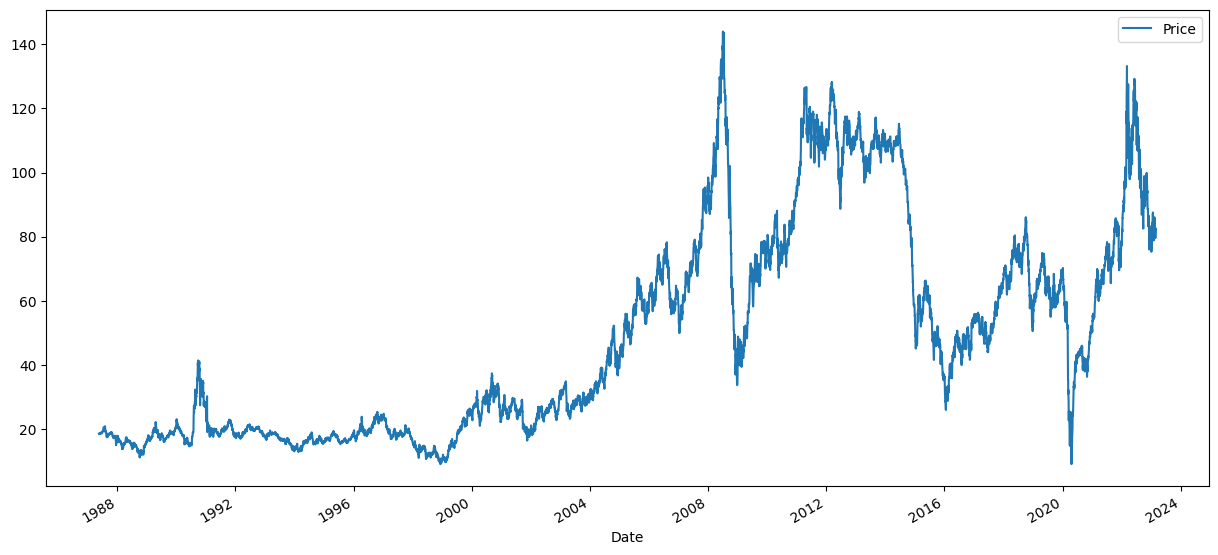

In [9]:
df.plot(figsize = (15,7))

In [10]:
df1 = df.reset_index()["Price"]
df1

0       18.63
1       18.45
2       18.55
3       18.60
4       18.63
        ...  
9076    82.14
9077    79.55
9078    82.08
9079    82.31
9080    82.31
Name: Price, Length: 9081, dtype: float64

In [11]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(9081, 1)

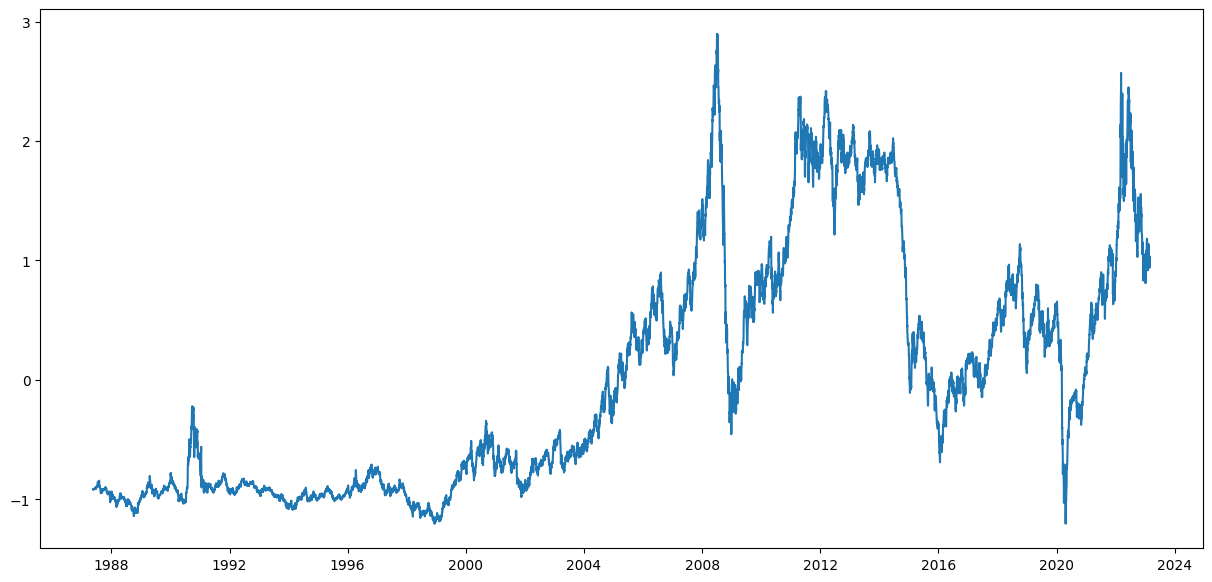

In [13]:
plt.figure(figsize = (15,7))
plt.plot(df.index,df1)

In [14]:
w = 100

In [15]:
training_size = int(len(df1)*0.96)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size+w,:],df1[training_size:len(df1),:]

In [16]:
train_data.shape , test_data.shape

((8817, 1), (364, 1))

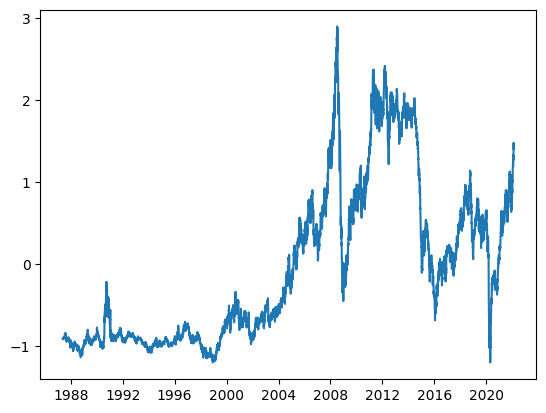

In [17]:
plt.plot(df.index[:training_size + 100],train_data)

In [18]:
def create_dataset(dataset,time_step = 1):
    dataX , dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = w
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [20]:
X_train.shape,X_test.shape

((8717, 100), (264, 100))

In [21]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [22]:
X_train

array([[[-0.9143252 ],
        [-0.91980041],
        [-0.91675862],
        ...,
        [-0.90976252],
        [-0.91523773],
        [-0.91584609]],

       [[-0.91980041],
        [-0.91675862],
        [-0.91523773],
        ...,
        [-0.91523773],
        [-0.91584609],
        [-0.9143252 ]],

       [[-0.91675862],
        [-0.91523773],
        [-0.9143252 ],
        ...,
        [-0.91584609],
        [-0.9143252 ],
        [-0.91523773]],

       ...,

       [[ 0.80458725],
        [ 0.78937833],
        [ 0.75743959],
        ...,
        [ 1.30009395],
        [ 1.34754579],
        [ 1.46526285]],

       [[ 0.78937833],
        [ 0.75743959],
        [ 0.75926466],
        ...,
        [ 1.34754579],
        [ 1.46526285],
        [ 1.47803835]],

       [[ 0.75743959],
        [ 0.75926466],
        [ 0.81553767],
        ...,
        [ 1.46526285],
        [ 1.47803835],
        [ 1.44123276]]])

In [23]:
X_test

array([[[0.75926466],
        [0.81553767],
        [0.84413045],
        ...,
        [1.47803835],
        [1.44123276],
        [1.40716477]],

       [[0.81553767],
        [0.84413045],
        [0.87393994],
        ...,
        [1.44123276],
        [1.40716477],
        [1.45035811]],

       [[0.84413045],
        [0.87393994],
        [0.91743746],
        ...,
        [1.40716477],
        [1.45035811],
        [1.48473027]],

       ...,

       [[1.27728057],
        [1.37035918],
        [1.38891406],
        ...,
        [1.03728377],
        [1.01751217],
        [0.93872995]],

       [[1.37035918],
        [1.38891406],
        [1.42845726],
        ...,
        [1.01751217],
        [0.93872995],
        [1.0156871 ]],

       [[1.38891406],
        [1.42845726],
        [1.5267069 ],
        ...,
        [0.93872995],
        [1.0156871 ],
        [1.0226832 ]]])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 10,batch_size = 128,verbose = 1)

Epoch 1/10
69/69 [==============================] - 24s 271ms/step - loss: 0.0648 - val_loss: 0.0501
Epoch 2/10
69/69 [==============================] - 16s 229ms/step - loss: 0.0097 - val_loss: 0.0559
Epoch 3/10
69/69 [==============================] - 16s 229ms/step - loss: 0.0088 - val_loss: 0.0362
Epoch 4/10
69/69 [==============================] - 16s 230ms/step - loss: 0.0071 - val_loss: 0.0329
Epoch 5/10
69/69 [==============================] - 17s 240ms/step - loss: 0.0072 - val_loss: 0.0308
Epoch 6/10
69/69 [==============================] - 17s 244ms/step - loss: 0.0060 - val_loss: 0.0299
Epoch 7/10
69/69 [==============================] - 16s 228ms/step - loss: 0.0058 - val_loss: 0.0300
Epoch 8/10
69/69 [==============================] - 17s 243ms/step - loss: 0.0053 - val_loss: 0.0292
Epoch 9/10
69/69 [==============================] - 16s 230ms/step - loss: 0.0050 - val_loss: 0.0352
Epoch 10/10
69/69 [==============================] - 16s 232ms/step - loss: 0.0048 - val_lo

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 31ms/step


In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.986659763078585

In [31]:
math.sqrt(mean_squared_error(y_test,test_predict))

99.97212227924904

In [32]:
train_predict.shape

(8717, 1)

In [33]:
test_predict.shape

(264, 1)

In [34]:
a = train_predict.reshape(train_predict.shape[0],)

In [35]:
b = test_predict.reshape(test_predict.shape[0],)

In [36]:
c = list(a) + list(b)

In [37]:
c

[17.80535,
 17.818686,
 17.828453,
 17.833897,
 17.834814,
 17.833727,
 17.832798,
 17.838404,
 17.85592,
 17.881634,
 17.913017,
 17.95108,
 17.993183,
 18.032228,
 18.063824,
 18.086935,
 18.100298,
 18.104715,
 18.099102,
 18.079556,
 18.03778,
 17.969887,
 17.87976,
 17.76741,
 17.640228,
 17.508238,
 17.381088,
 17.26516,
 17.162476,
 17.06939,
 16.97982,
 16.895462,
 16.821302,
 16.765518,
 16.73147,
 16.71633,
 16.716537,
 16.729164,
 16.74985,
 16.773779,
 16.798117,
 16.82474,
 16.856026,
 16.889038,
 16.91731,
 16.93415,
 16.938356,
 16.934162,
 16.911314,
 16.85403,
 16.752565,
 16.594522,
 16.388998,
 16.150156,
 15.913466,
 15.7154455,
 15.574901,
 15.49504,
 15.476283,
 15.519938,
 15.61637,
 15.756328,
 15.914695,
 16.08169,
 16.235281,
 16.355001,
 16.419943,
 16.428701,
 16.392149,
 16.325361,
 16.244925,
 16.167852,
 16.101221,
 16.051302,
 16.01517,
 15.984683,
 15.94913,
 15.902186,
 15.845363,
 15.779971,
 15.709674,
 15.63827,
 15.569663,
 15.505824,
 15.454013,
 

In [38]:
len(c)

8981

In [39]:
t = []
for i in range(100):
  t.append(np.NAN)

In [40]:
d = t+c

In [41]:
len(d)

9081

In [42]:
df["predicted_price"] = d

<ipython-input-42-e0c1e02b98e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["predicted_price"] = d


In [43]:
df

,Price,predicted_price
Date,,
1987-05-20,18.63,NaN
1987-05-21,18.45,NaN
1987-05-22,18.55,NaN
1987-05-25,18.60,NaN
1987-05-26,18.63,NaN
...,...,...
2023-02-21,82.14,85.071350
2023-02-22,79.55,84.819199
2023-02-23,82.08,84.224213


In [44]:
ddf = df[100:]
ddf

,Price,predicted_price
Date,,
1987-10-08,18.63,17.805349
1987-10-09,18.60,17.818686
1987-10-12,18.55,17.828453
1987-10-13,18.55,17.833897
1987-10-14,18.68,17.834814
...,...,...
2023-02-21,82.14,85.071350
2023-02-22,79.55,84.819199
2023-02-23,82.08,84.224213


In [45]:
test_data.shape

(364, 1)

In [46]:
x_input = test_data[-100:].reshape(1,-1)
x_input

array([[1.42845726, 1.5267069 , 1.47347567, 1.41385669, 1.36123382,
        1.41355252, 1.32412405, 1.28823099, 1.2401708 , 1.29735635,
        1.30283156, 1.31195691, 1.30435245, 1.31013184, 1.34572072,
        1.38343885, 1.39773524, 1.35697532, 1.4123358 , 1.44123276,
        1.41750684, 1.5464785 , 1.55682057, 1.46495867, 1.34937086,
        1.38587228, 1.45035811, 1.3657965 , 1.38739317, 1.33598701,
        1.28701428, 1.22404934, 1.20914459, 1.21553234, 1.13188327,
        1.12245373, 1.05583865, 1.05888044, 1.05036344, 1.12306209,
        1.14344205, 1.15135069, 1.05462194, 0.94998455, 0.86451041,
        0.83135495, 0.8420012 , 0.89158229, 0.95667648, 1.0537094 ,
        1.02359574, 0.95850155, 1.0029116 , 0.93568816, 0.96002244,
        0.93964248, 1.0269417 , 1.00412832, 0.98161911, 1.0381963 ,
        0.9633684 , 0.80975828, 0.85295162, 0.84321791, 0.87637337,
        0.90374943, 0.98618179, 1.0312002 , 1.05675119, 1.03302527,
        1.08564814, 1.06739743, 1.10694063, 1.16

In [47]:
temp_input = list(x_input)

In [48]:
temp_input

[array([1.42845726, 1.5267069 , 1.47347567, 1.41385669, 1.36123382,
        1.41355252, 1.32412405, 1.28823099, 1.2401708 , 1.29735635,
        1.30283156, 1.31195691, 1.30435245, 1.31013184, 1.34572072,
        1.38343885, 1.39773524, 1.35697532, 1.4123358 , 1.44123276,
        1.41750684, 1.5464785 , 1.55682057, 1.46495867, 1.34937086,
        1.38587228, 1.45035811, 1.3657965 , 1.38739317, 1.33598701,
        1.28701428, 1.22404934, 1.20914459, 1.21553234, 1.13188327,
        1.12245373, 1.05583865, 1.05888044, 1.05036344, 1.12306209,
        1.14344205, 1.15135069, 1.05462194, 0.94998455, 0.86451041,
        0.83135495, 0.8420012 , 0.89158229, 0.95667648, 1.0537094 ,
        1.02359574, 0.95850155, 1.0029116 , 0.93568816, 0.96002244,
        0.93964248, 1.0269417 , 1.00412832, 0.98161911, 1.0381963 ,
        0.9633684 , 0.80975828, 0.85295162, 0.84321791, 0.87637337,
        0.90374943, 0.98618179, 1.0312002 , 1.05675119, 1.03302527,
        1.08564814, 1.06739743, 1.10694063, 1.16

In [49]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[1.4284572600199725,
 1.5267069008061303,
 1.4734756712780261,
 1.4138566942065496,
 1.361233821587338,
 1.4135525157521032,
 1.3241240501448883,
 1.288230992520224,
 1.2401707967177067,
 1.2973563461536133,
 1.3028315583336465,
 1.3119569119670358,
 1.304352450605878,
 1.3101318412403582,
 1.3457207204105766,
 1.3834388487619187,
 1.3977352361208952,
 1.3569753232250896,
 1.4123358019343182,
 1.4412327551067172,
 1.4175068356599054,
 1.5464785003451404,
 1.5568205677963152,
 1.4649586745535295,
 1.349370861863932,
 1.3858722763974891,
 1.450358108740107,
 1.3657964984040327,
 1.3873931686697205,
 1.3359870098682944,
 1.2870142787024386,
 1.2240493386320528,
 1.2091445943641832,
 1.215532341907556,
 1.1318832669348209,
 1.1224537348469852,
 1.0558386533232436,
 1.0588804378677066,
 1.0503634411432097,
 1.1230620917558778,
 1.1434420482037806,
 1.1513506880193847,
 1.0546219395054581,
 0.9499845511759277,
 0.8645104054765147,
 0.8313549539418669,
 0.842001199847488,
 0.8915822879222363,

In [56]:
# demonstrate for the next 30 days
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=1)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


0 day input [0.9633684  0.80975828 0.85295162 0.84321791 0.87637337 0.90374943
 0.98618179 1.0312002  1.05675119 1.03302527 1.08564814 1.06739743
 1.10694063 1.16412618 1.18176853 1.11211167 1.10694063 1.14374623
 1.11545763 1.10146542 1.05644701 1.00139071 0.96975615 0.91743746
 0.96701854 1.04123809 1.07926039 1.05766372 1.11849941 1.13431669
 1.10329049 1.07743532 1.06922251 1.01234113 1.03728377 1.01751217
 0.93872995 1.0156871  1.0226832  1.0226832  1.02867091 1.02011251
 1.01598394 1.01502991 1.01611352 1.01839662 1.0213474  1.02467048
 1.02822709 1.03196561 1.03587389 1.0399518  1.04419911 1.04861021
 1.05317569 1.05788279 1.06271911 1.06767297 1.07273436 1.07789552
 1.0831511  1.08849633 1.09392929 1.09944785 1.1050514  1.11074054
 1.11651504 1.12237585 1.12832439 1.13436115 1.14048815 1.14670706
 1.15301836 1.15942454 1.16592753 1.17252791 1.17922843 1.18603015
 1.19293451 1.1999445  1.20706069 1.21428525 1.22161961 1.22906637
 1.23662651 1.24430215 1.2520951  1.26000786 1.268

In [53]:
lst_output

[[1.0286709070205688],
 [1.0201125144958496],
 [1.0159839391708374],
 [1.0150299072265625],
 [1.016113519668579],
 [1.0183966159820557],
 [1.0213474035263062],
 [1.0246704816818237],
 [1.0282270908355713],
 [1.0319656133651733],
 [1.0358738899230957],
 [1.0399518013000488],
 [1.0441991090774536],
 [1.0486102104187012],
 [1.053175687789917],
 [1.0578827857971191],
 [1.0627191066741943],
 [1.0676729679107666],
 [1.0727343559265137],
 [1.0778955221176147],
 [1.08315110206604],
 [1.0884963274002075],
 [1.0939292907714844],
 [1.0994478464126587],
 [1.1050513982772827],
 [1.1107405424118042],
 [1.116515040397644],
 [1.1223758459091187],
 [1.1283243894577026],
 [1.1343611478805542]]

In [54]:
forecast = scaler.inverse_transform(lst_output)
forecast

array([[82.50684843],
       [82.22548753],
       [82.08975881],
       [82.05839459],
       [82.09401882],
       [82.16907661],
       [82.26608505],
       [82.3753327 ],
       [82.49225778],
       [82.61516335],
       [82.74364965],
       [82.87771278],
       [83.01734488],
       [83.16236177],
       [83.31245384],
       [83.46720175],
       [83.62619792],
       [83.78905828],
       [83.95545363],
       [84.12512923],
       [84.29790872],
       [84.47363535],
       [84.6522464 ],
       [84.83367134],
       [85.01789056],
       [85.20492367],
       [85.39476282],
       [85.58743937],
       [85.78300034],
       [85.98146142]])

In [57]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [58]:
!pip install tensorflow

In [60]:
model.save('lstm_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load the trained LSTM model
model = load_model('lstm_model.h5')

# Load the scaler used during training
scaler = StandardScaler()
scaler.fit_transform(np.array([[0]]))  # Dummy fit for demonstration purposes

# Define a function to preprocess input data
def preprocess_input(data):
    # Apply any necessary preprocessing steps (e.g., scaling)
    scaled_data = scaler.transform(data)

    # Reshape the data to match the expected input shape of the LSTM model
    # Assuming your model expects input shape (batch_size, time_steps, features)
    time_steps = 100  # Assuming 100 time steps
    reshaped_data = scaled_data.reshape(1, time_steps, 1)

    return reshaped_data

# Streamlit UI
st.title('LSTM Model Deployment')

# Input form for user to input data
input_data = st.text_area("Input Data (comma-separated values)", value="", height=100)

# Convert input string to array
if input_data:
    input_data = np.array([float(x.strip()) for x in input_data.split(',')])

    # Preprocess the input data and make predictions
    processed_data = preprocess_input(input_data)
    predictions = model.predict(processed_data)

    # Display predictions
    st.subheader('Predictions')
    st.write(predictions)


2024-02-26 14:36:14.988 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [62]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
